# {Teen Pregnancy and Sex Education in the US}📝

![Banner](./assets/banner.jpeg)

## Topic
*What problem are you (or your stakeholder) trying to address?*
📝 <!-- Answer Below -->

I am addressing the problem of teen pregnancy in the United States and examining if and how it relates to a lack of sex education. 

## Project Question
*What specific question are you seeking to answer with this project?*
*This is not the same as the questions you ask to limit the scope of the project.*
📝 <!-- Answer Below -->

The specific question I am seeking to answer with this project is: "Is there a correlation between lack of sex education and increased teen pregnancy?"

## What would an answer look like?
*What is your hypothesized answer to your question?*
📝 <!-- Answer Below -->

An answer could be expressed with a visualization such as a table or a bar chart showcasing the states with the highest and lowest teen pregnancy numbers, their overall population, and  their policies surrounding sex education. 

The answer itself would be: "Yes/No, there is/isn't strong evidence to suggest increased teen pregnancy directly correlates to a lack of sex education." 

## Data Sources
*What 3 data sources have you identified for this project?*
*How are you going to relate these datasets?*
📝 <!-- Answer Below -->

My datasets are:
- CDC Wonder (https://wonder.cdc.gov/controller/datarequest/D149;jsessionid=C8DCABB90CDF366055F96EA1D525 and https://wonder.cdc.gov/controller/datarequest/D192;jsessionid=70DEF061E23E358712E1506B71DF). This is a query based data source that allows you to view birth rates with different filters. I have imported the 2016-2024 and 2024-2025 natality datasets. 

- The United States Census (https://data.census.gov/table?q=teen+population+by+state&y=2024). This is united states census data filtered to focus on female teens aged 15-19. 

- Parents Defending Education: Sex Education Laws By State (https://actionpde.org/sex-education-laws-by-state/). This is a website showcasing sex education laws by state. I have downloaded the website data as a PDF and extracted the raw text using pdfplumber. 

I will relate these datasets by state. When applicable, I will also use year, "Mandate Sex Ed" (Sex Education Laws By State), and age. 

## Approach and Analysis
*What is your approach to answering your project question?*
*How will you use the identified data to answer your project question?*
📝 <!-- Start Discussing the project here; you can add as many code cells as you need -->

My approach will be to:
- Calculate the average and raw teen pregnancy rate per state using census population numbers and CDC natality data. (This step had to be delayed due to issues with the census website)

- Extract data from the Sex Education Laws by State site and convert it into a usable table, including whether sex education is required and how comprehensive it is. 

- Connect datasets by year and when applicable "Mandate Sex Ed" and/or age. 

- Explore visualizations to illustrate the data and results. 

In [1]:
# Start your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import pdfplumber
import openpyxl

# Importing my sources: 

#New Census data: 
USCensusdf = pd.read_excel("USCensusUpdated1125.xlsx")
#Birth data from 2016-2024
BirthData20162024 = pd.read_csv("Natality, 2016-2024 expanded-2.csv")
#Birth data from 2023 to July 2025
BirthData2025 = pd.read_csv("Provisional Natality 2023 through Last Month-2.csv")

#Using pdfplumber to extract text from PDE-Action_-Sex-Education-State-Laws_v2-1.pdf, which will later be used to create a dataframe
#First extracting the first page as a test
# with pdfplumber.open("PDE-Action_-Sex-Education-State-Laws_v2-1.pdf") as pdf_v1:
#     pdf_full_text_v1 = ""
#     for page in pdf_v1.pages:
#             pdf_full_text_v1 += page.extract_text() + "\n"
with pdfplumber.open("PDE-Action_-Sex-Education-State-Laws_v2-3.pdf") as pdf_v3:
    pdf_full_text_v3 = ""
    for page in pdf_v3.pages:
            pdf_full_text_v3 += page.extract_text() + "\n"

## Checkpoint 2: Exploratory Data Analysis & Visualization - Data Cleaning and Transformation

For checkpoint 2, I created three dataframes using my state laws PDf, my 2016-2024 natality data, and my 2025 natality data.  Then, I created four basic visualizations to showcase the organized data.  My plans moving forward are to create a fourth dataframe with my U.S. census data (the website is currently not updating due to the government shutdown. I had planned to change the filters on this dataset before cleaning and creating my dataframe, but I will save it for the next checkpoint.)

- First, I configured the PDF into usable data (below). This was done by extracting the raw text from the PDF document, splitting the raw text into lines, then putting the answers to the questions I need into a dataframe. I'm currently only using Q1 (Does the state mandate sex ed?) and Q2 (Does the state have an opt-in/opt-out policy?) to make the dataframe creation process quicker. This process may be changed later if I decided to add the answers to other questions on the document to my dataset. 

- Scroll down to see the data cleaning and transformation of my remaining sources + my visualizations. The steps I took and a detailed description/analysis of each visualization is below the data transcormation code blocks. 

In [2]:
#Configuring the PDF into usable data.
import re
import pandas as pd

#Splitting my text into lines
lines = pdf_full_text_v3.strip().split('\n')
if lines[0].lower().startswith("state"):
    lines = lines[1:]
#Creating my dataframe
data = [line.split(maxsplit=2) for line in lines if line.strip()]
StateLawDF = pd.DataFrame(data, columns=["State", "Mandates Sex Ed?", "Opt-in/Opt-out Policy?"])

In [38]:
#Testing the PDF Dataframe
#print(pdf_full_text_v3)
#print(StateLawDF)
#print(StateLawDF["Mandates Sex Ed?"].value_counts())
#print(StateLawDF["State"].value_counts())

- Next, I cleaned my Natality, 2016-2024 expanded-2 excel document (below). I abbreviated the state names to match the Sex-Education-State-Laws document, simplified the "State of Residence" header to "State", and created a dataframe with my cleaned data.

- Scroll down to see the data cleaning and transformation of my remaining sources. 

In [3]:
#Birth data from 2016-2024. Columns are State of Residence, Age of Mother, Births.
#State will need to be abbeviated and "State of Residence" will be changed to "State"
import pandas as pd
BirthData20162024 = pd.read_csv("Natality, 2016-2024 expanded-2.csv")

#Cleaning the data: 
#1. State needs to be abbreviated from full name to two-letter postal code, so it will match the data in the state laws PDF. 
state_abbreviations = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "District of Columbia": "DC",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY"
}

#Creating a pandas dataframe with state, age of mother, and births
BirthData20162024 = pd.DataFrame(BirthData20162024, columns=["State of Residence", "Age of Mother", "Births"])
#Mapping the state names to abbreviations
BirthData20162024["State Abbreviation"] = BirthData20162024["State of Residence"].map(state_abbreviations)
#Dropping the original state name column
BirthData20162024 = BirthData20162024.drop(columns=["State of Residence"])
#Renaming the new column to "State"
BirthData20162024 = BirthData20162024.rename(columns={"State Abbreviation": "State"})

total_births_by_state_2016_2024 = BirthData20162024.groupby("State")["Births"].sum().reset_index()
#Testing the cleaned Birth Dataframe
#print(BirthData20162024)

- The next step in the data cleaning process was to repeat the above steps with the 2023 - 2025 natality dataset (below). The only difference is the 2023-25 set had some blank values at the end that needed to be dropped. 

In [4]:
#We're repeating the above process for the 2023-2025 Birth Data

#Birth data from 2023 to July 2025
import pandas as pd
BirthData2025 = pd.read_csv("Provisional Natality 2023 through Last Month-2.csv")

BirthData20232025 = pd.DataFrame(BirthData2025, columns=["State of Residence", "Age of Mother", "Births"])
#Mapping the state names to abbreviations
BirthData20232025["State Abbreviation"] = BirthData20232025["State of Residence"].map(state_abbreviations)
#Dropping the original state name column
BirthData20232025 = BirthData20232025.drop(columns=["State of Residence"])
#Renaming the new column to "State"
BirthData20232025 = BirthData20232025.rename(columns={"State Abbreviation": "State"})
#Dropping any blank values
BirthData20232025.dropna(how="all", inplace=True)

total_births_by_state_2023_2025 = BirthData20232025.groupby("State")["Births"].sum().reset_index()

#Testing the cleaned Birth Dataframe
# pd.set_option("display.max_rows", None)
# print(BirthData20232025)

- As of checkpoint #3, the U.S. Census website is up-to-date and the dataset can be added! As with the previous datasets, I mapped the state names to their abbreviations.  On the census website, I filtered for female population aged 15-19 by state and exported only those values, so the dataset is luckily already free of unneeded values. 
- There was still a bit of cleaning to do. Namely, unlike the previous datasets, there isn't a state column. Each state has its own column. I needed to create a state column, so I used "melt" to change it from wide format to long format. The sources I used for this are linked below and in the resources section:
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.melt.html
- https://www.geeksforgeeks.org/python/python-pandas-melt/
- The population numbers were initially strings, so I had to change them to int and drop the commas separating the values. I also had to drop the row name Female Population 15-19 Years" from the second row, since there were issues with my ["Teen_Female_Population"].str.replace trying to convert it to an int when it's a string. 
<br><br>

- It should be noted that this dataset is missing data for DC and Alaska.  

In [5]:
#New Census data: 
USCensusdf = pd.read_excel("USCensusUpdated1125.xlsx")
#there is a separate column for each state, so I used melt to stack them into a single column
CensusPopulationClean = USCensusdf.melt(var_name="State", value_name="Teen_Female_Population")
#Map state names to abbreviations
state_abbreviations = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "District of Columbia": "DC",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY"
}
#Mapping my melted state names to abbreviations
CensusPopulationClean["State"] = CensusPopulationClean["State"].map(state_abbreviations)
# dropping the row name "Female Population 15-19 Years" from teen_female_population column because it's not a number
CensusPopulationClean = CensusPopulationClean[CensusPopulationClean["Teen_Female_Population"] != "Female Population 15-19 Years"]
# dropping commas from the population numbers and converting to integers, they were originally stored as strings
CensusPopulationClean["Teen_Female_Population"] = CensusPopulationClean["Teen_Female_Population"].str.replace(",", "").astype(int)
#testing
#print(CensusPopulationClean)

## Checkpoint 2: Exploratory Data Analysis & Visualization - Data Visualization and EDA

Two visualization libraries used: Matplotlib and Seaborn. 

Write up of the data below:

**Visualization #1:** Count of states (50 states + DC) mandating sex-ed by answer (yes, no, partial)
- This visualization was created to test out my dataframe + show the counts of how many states (plus DC) have mandated sex-ed policies. "Partial" refers to states that have sex-ed mandated, but is not all comprehensive (for example, they could teach about STDs, but not about safe sex practices). 
- This visualization illustrates that the majority of states (41/50) have at least some kind of sex-ed policy. This data will be used with the natality (and eventually U.S. census data) to visualize correlations between mandated sex-ed and teen pregancies. 

**Visualization #2:** Count of states (50 states + DC) by opt-in/opt-out policy type (opt-in, opt-out, no policy)
- This visualization shows how many states have an opt-in/opt-out policy, meaning the parents can request for their children to be included or excluded from sex-ed.  
- Interestingly, the number of states with no opt-in/out policy is 8.  I'd like to compare this figure with the states mandating sex-ed to see which states have no opt-in policy, since 10 states have no mandated sex ed.
- This raises the question, are there any states that both have no mandated sex-ed and have an opt-in/out policy? This seems contradictory and could point to some problems in how I cleaned my data, so I should go back and compare these numbers. 

**Visualization #3:** Line graph showing trend of births from 2016 to 2025. This line graph showcases the natality data from the 2016-2024 and 2023-2025 datasets. 
- This is a double line graph showing the count of births per state for each of the natality datasets.  The datasets seem to follow the same trends, which is a good sign because it means there were likely no major policy changes between years that were missed. 
- The 2023-2025 data shows lower peaks than the 2016-2024 data. This raises questions about what changed during this time to lower the teen birth rate (quarantine due to Covid-19, smaller dataset, etc?)
- The line chart shows the highest peaks in California and Texas. What's causing these peaks, what are their state policies, etc?

**Visualizations #4 and #5:** Bar charts showing top and bottom 10 states with highest teen births from 2023-2025, whether they have a mandated sex ed policy, and whether they have an opt-in/opt-out policy
- Before using the U.S. census data to calculate births per 1000 female teens, the only state in the top 10 with no mandated sex-ed was the #1 state, Texas.  After the adjustment, the results were closer to what I had initially expected. Out of the top ten, six have partial or no sex ed mandate. 
- Of the bottom ten, six have a full sex ed mandate and only one has no mandate. 

- These visualizations were the most difficult to get right, and originally I planned to show it as multiple different visualizations (top/bottom states by mandate policy and top states by opt in/out policy).

The sources I used for this visualization (matplotlib tutorials): 
- https://pythonguides.com/transparent-plot-backgrounds-and-legend-styling-matplotlib-python/
- https://matplotlib.org/stable/gallery/shapes_and_collections/hatch_style_reference.html
- https://matplotlib.org/stable/users/explain/customizing.html


**Visualization #6:** This visualization is a bar chart merging the 2025 natality dataset with the state laws dataset by State.  It compares the avg births with the required sex-ed policies. 
- This visualization is the most telling, showcasing the highest rates of teen pregnancy in states that have no or partial mandated sex-ed. 
- It strongly points towards a correlation between sex-ed and teen pregancy, suggesting that mandated sex-ed will lower the teen pregancy rates in the U.S. 


Scroll down to see each visualization and to move forward to checkpoint 3


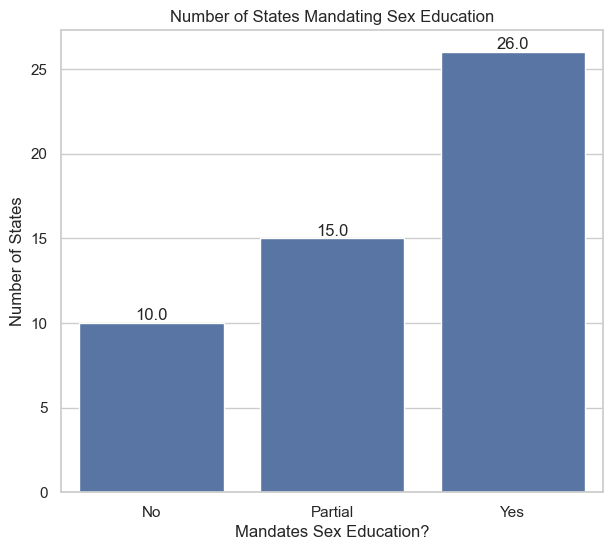

In [9]:
#Visualization #1: Count of states (50 states + DC) mandating sex ed by answer (yes, no, partial)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize=(7, 6))
ax = sns.countplot(x="Mandates Sex Ed?", data=StateLawDF)
ax.set_title("Number of States Mandating Sex Education")
ax.set_xlabel("Mandates Sex Education?")
ax.set_ylabel("Number of States")
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom')
plt.show()


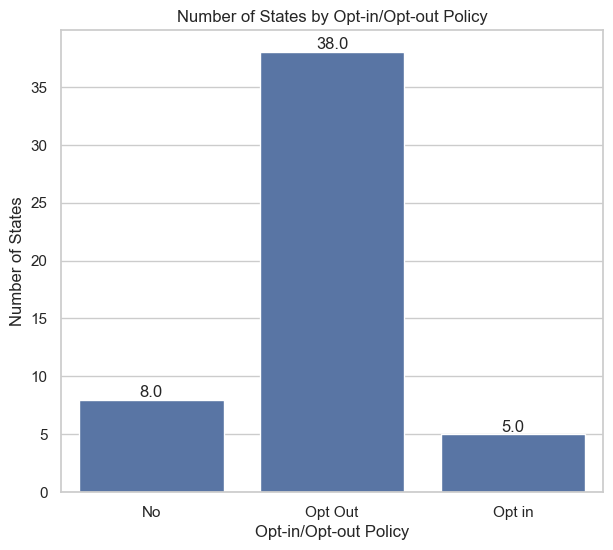

In [11]:
#Visualization #2: Count of states (50 states + DC) by opt-in/opt-out policy type (opt-in, opt-out, no policy)
plt.figure(figsize=(7, 6))
ax = sns.countplot(x="Opt-in/Opt-out Policy?", data=StateLawDF)
ax.set_title("Number of States by Opt-in/Opt-out Policy")
ax.set_xlabel("Opt-in/Opt-out Policy")
ax.set_ylabel("Number of States")
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom')
plt.show()

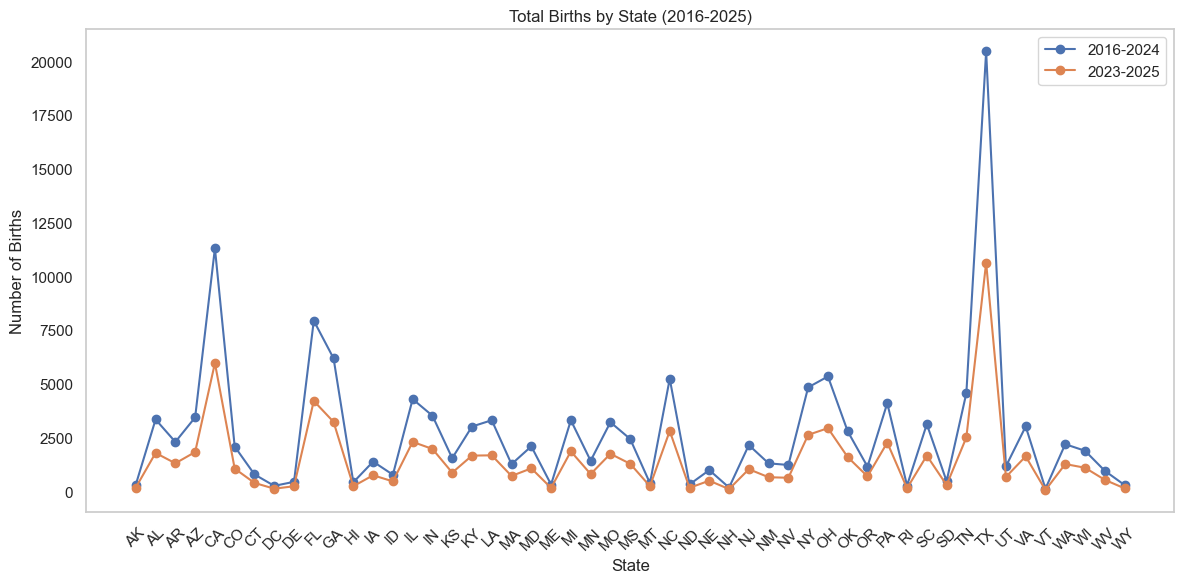

In [12]:
# Visulization #3: Line graph showing trend of births from 2016 to 2025
# Two separate lines, one for the 2016-2024 data and one for the 2023-2025 data

import matplotlib.pyplot as plt
import numpy as np
total_births_by_state_2023_2025 = BirthData20232025.groupby("State")["Births"].sum().reset_index()

#total births by state for each dataset
plt.figure(figsize=(12, 6))
states = total_births_by_state_2016_2024["State"]
plt.plot(states, total_births_by_state_2016_2024["Births"], marker='o', label='2016-2024')
plt.plot(states, total_births_by_state_2023_2025["Births"], marker='o', label='2023-2025')
plt.title("Total Births by State (2016-2025)")
plt.xlabel("State")
plt.ylabel("Number of Births")
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()


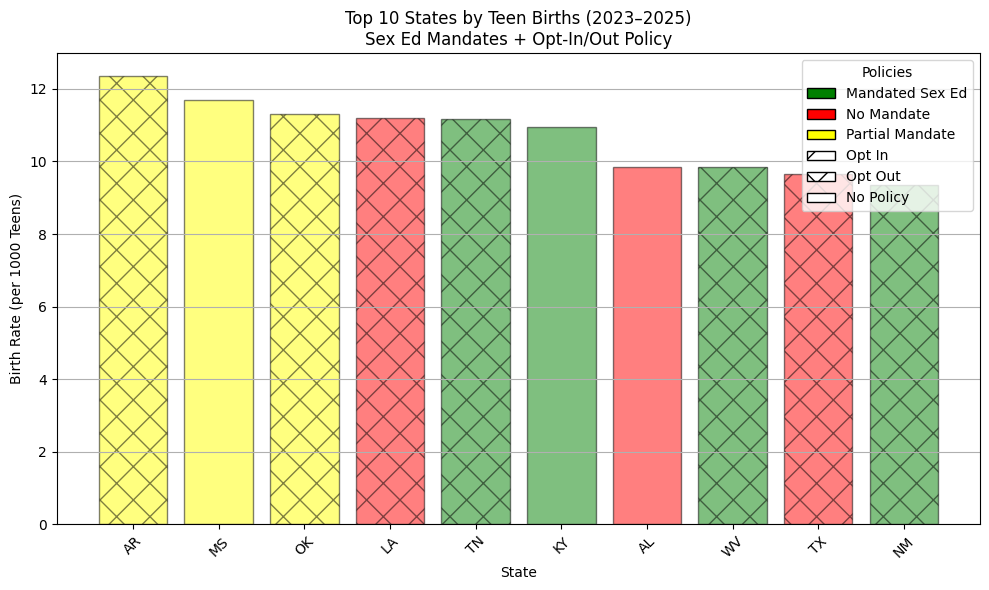

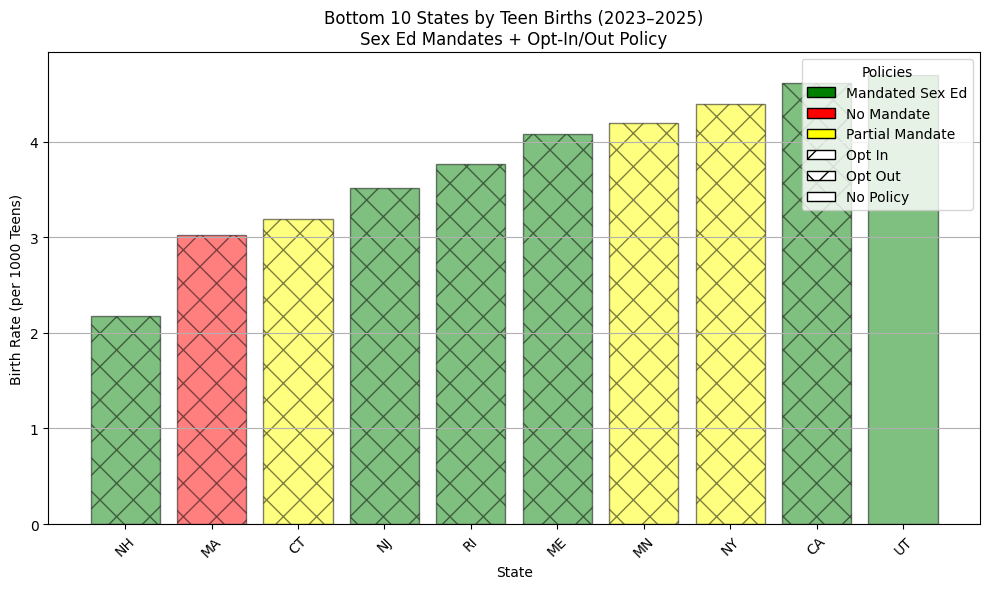

In [23]:
# Visualizations #4 and 5: Bar chart showing top 10 states with highest and lowest teen births from 2023-2025
# whether they have a mandated sex ed policy, and whether they have an opt-in/opt-out policy.
#As of checkpoint 3, this is calculated using birth rate per 1000 rather than total births

import matplotlib.patches as mpatches
# Define color and hatch maps
color_map = {
    "Yes": "green",
    "No": "red",
    "Partial": "yellow"
}
hatch_map = {
    "Opt In": "/",
    "Opt Out": "x",
    "No": ""
}
#merging dataframes with pandas
merged_data = pd.merge(total_births_by_state_2023_2025, StateLawDF, on="State")
merged_data = pd.merge(merged_data, CensusPopulationClean, on="State")
#New addition as of Checkpoint 3: calculating the birth rate per 1000 teens with the US census data
merged_data["BirthRate"] = merged_data["Births"] / merged_data["Teen_Female_Population"] * 1000
top_10_states = merged_data.nlargest(10, "BirthRate")
plt.figure(figsize=(10, 6))
for i, row in top_10_states.iterrows():
    plt.bar(
        row["State"],
        row["BirthRate"],
        color=color_map.get(row["Mandates Sex Ed?"], "gray"),
        hatch=hatch_map.get(row["Opt-in/Opt-out Policy?"], ""),
        edgecolor="black",
        alpha=0.5 
    )
plt.title("Top 10 States by Teen Births (2023–2025)\nSex Ed Mandates + Opt-In/Out Policy")
plt.xlabel("State")
plt.ylabel("Birth Rate (per 1000 Teens)")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.tight_layout()
#Legend that shows color and hatch meanings
legend_elements = [
    mpatches.Patch(facecolor="green", edgecolor="black", label="Mandated Sex Ed"),
    mpatches.Patch(facecolor="red", edgecolor="black", label="No Mandate"),
    mpatches.Patch(facecolor="yellow", edgecolor="black", label="Partial Mandate"),
    mpatches.Patch(facecolor="white", edgecolor="black", hatch="/", label="Opt In"),
    mpatches.Patch(facecolor="white", edgecolor="black", hatch="x", label="Opt Out"),
    mpatches.Patch(facecolor="white", edgecolor="black", hatch="", label="No Policy")
]
plt.legend(handles=legend_elements, title="Policies", loc="upper right")
plt.show()
color_map = {
    "Yes": "green",
    "No": "red",
    "Partial": "yellow"
}
hatch_map = {
    "Opt In": "/",
    "Opt Out": "x",
    "No": ""
}
#merging dataframes with pandas
merged_data = pd.merge(total_births_by_state_2023_2025, StateLawDF, on="State")
merged_data = pd.merge(merged_data, CensusPopulationClean, on="State")
#New addition as of Checkpoint 3: calculating the birth rate per 1000 teens with the US census data
merged_data["BirthRate"] = merged_data["Births"] / merged_data["Teen_Female_Population"] * 1000
top_10_states = merged_data.nsmallest(10, "BirthRate")
plt.figure(figsize=(10, 6))
for i, row in top_10_states.iterrows():
    plt.bar(
        row["State"],
        row["BirthRate"],
        color=color_map.get(row["Mandates Sex Ed?"], "gray"),
        hatch=hatch_map.get(row["Opt-in/Opt-out Policy?"], ""),
        edgecolor="black",
        alpha=0.5 
    )
plt.title("Bottom 10 States by Teen Births (2023–2025)\nSex Ed Mandates + Opt-In/Out Policy")
plt.xlabel("State")
plt.ylabel("Birth Rate (per 1000 Teens)")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.tight_layout()
#Legend that shows color and hatch meanings
legend_elements = [
    mpatches.Patch(facecolor="green", edgecolor="black", label="Mandated Sex Ed"),
    mpatches.Patch(facecolor="red", edgecolor="black", label="No Mandate"),
    mpatches.Patch(facecolor="yellow", edgecolor="black", label="Partial Mandate"),
    mpatches.Patch(facecolor="white", edgecolor="black", hatch="/", label="Opt In"),
    mpatches.Patch(facecolor="white", edgecolor="black", hatch="x", label="Opt Out"),
    mpatches.Patch(facecolor="white", edgecolor="black", hatch="", label="No Policy")
]
plt.legend(handles=legend_elements, title="Policies", loc="upper right")


C:\Users\eghea\AppData\Local\Temp\ipykernel_4492\3153643971.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=merged_data["Mandates Sex Ed?"], y=merged_data["Births"], ci=None)


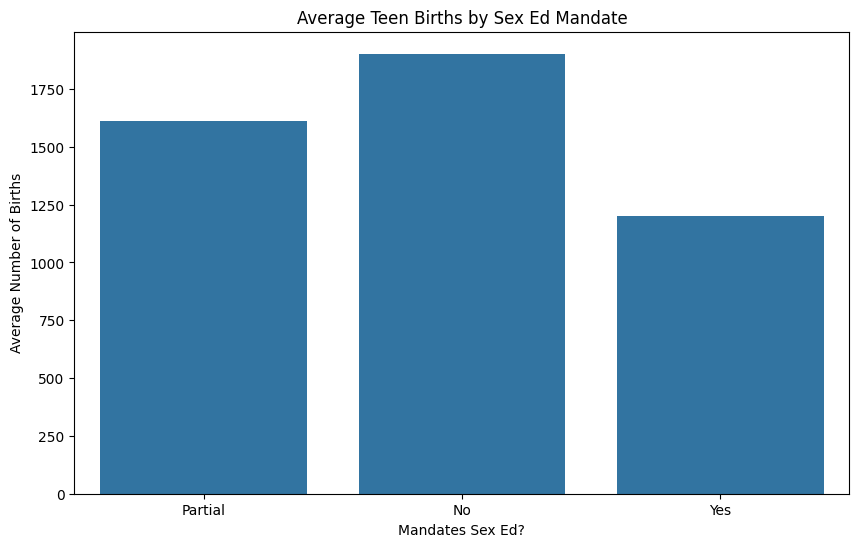

In [ ]:
#Visualization #6: Bar chart showing average teen births from 2023-2025 by whether the state mandates sex-ed
import seaborn as sns
merged_data = pd.merge(total_births_by_state_2023_2025, StateLawDF, on="State")
merged_data.groupby("Mandates Sex Ed?")["Births"].mean()

#visualizing merged_data as a bar chart 
plt.figure(figsize=(10, 6))
sns.barplot(x=merged_data["Mandates Sex Ed?"], y=merged_data["Births"], ci=None)
plt.title("Average Teen Births by Sex Ed Mandate")
plt.xlabel("Mandates Sex Ed?")
plt.ylabel("Average Number of Births")
plt.show()

## Checkpoint 3: Machine Learning (Regression/Classification)
**What type of machine learning model are you planning to use?**
- I'm planning to use a regression model to plot birth rates by population in correlation to whether or not sex ed is required. This will involve combining the natality, state law, and census datasets. 

**What are the challenges have you identified/are you anticipating in building your machine learning model?**
- I anticipate challenges dealing with the categorical data, such as the yes/no/partial mandate sex ed answers. These will need to be made into numerical values in order for the regression model to work. 

**How are you planning to address these challenges?**
- After some research, I discovered that I can change my categorical data to numerical values using the pandas get_dummies method. 

### Step one: Training my regression model

Using our earlier regression lab as a guide, I built my regression model with the aim to create a scatter plot with a regression line plotted over it, showcasing the correlation between sex ed and birthrate. Dealing with the categorical data was a bit of a puzzle, but after some research I was able to convert them to usable numerical values using get_dummies. The sources used for this are linked both in this markdown cell and in the resources section at the end of the notebook. 


While completing this step, I was finally able to incorporate the U.S. census data and I realized I'd made a key error when creating my earlier visualizations. I had been plotting the raw birth rates per state, without taking population into account. This means states with larger populations appeared to have crazy high birth rates compared to smaller states, throwing off the results. I adjusted a few of my earlier visualizations and made sure to include population when creating my regression model. The results speak for themselves! 

**EDA, Prepare, Process, Analyze**

 **Prepare**: 
 - I used the train_test_split method to split my data to get my training and test sets. This method allowed me to quickly fit the model to the training data and then test it with unseen data. 
 - One source I used suggested a 25/75 split, but I went with 80/20 after doing some more research. The sources I used for are linked below and in the references section at the end of the notebook. 

**Process**: 
- At this point, any missing data has been handled during the earlier **EDA** process and doesn't need to be addressed during the machine learning process. Additionally, since the data points are categotical, scaling wasn't necessary. 

**Analyze**: 
- **Test results**: When testing my model, I printed the results of the test data, which showed that a partial mandate reduces births by about 0.5 per 1000 while a full mandate reduces births by a little over 1.5 per 1000. This aligns with the actual mean of yes, partial, and no mandates, seen below:
<br>
No:         7.720154<br>
Partial:    7.125220<br>
Yes:        6.710088
- **Implementing another model**: I created a polynomial regression model to compare with my initial model. (seen below the scatter plot visualization). Becase polynomial regression models work by raising data points to the nth degree, it wasn't the best fit for my categorical data and ended up producing some confusing results.
- **Metrics**: 


Sources used:
- https://www.geeksforgeeks.org/pandas/python-pandas-get_dummies-method/
- https://www.geeksforgeeks.org/machine-learning/multiple-linear-regression-with-scikit-learn/
- https://saturncloud.io/blog/linear-regression-with-sklearn-using-categorical-variables/
- https://realpython.com/train-test-split-python-data/#training-validation-and-test-sets
- https://www.techtarget.com/searchenterpriseai/definition/data-splitting
- https://www.geeksforgeeks.org/machine-learning/python-implementation-of-polynomial-regression/#google_vignette




In [28]:
#Using sklearn to train a Linear Regression model on state laws data and 23-25 natality data
#X = pd.get_dummies(merged_data["Mandates Sex Ed?"], prefix="Mandate")
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd
regression_merged_data = pd.merge(total_births_by_state_2023_2025, StateLawDF, on="State")
regression_merged_data = pd.merge(regression_merged_data, CensusPopulationClean, on="State")
regression_merged_data["BirthRate"] = regression_merged_data["Births"] / regression_merged_data["Teen_Female_Population"] * 1000
regression_merged_data.groupby("Mandates Sex Ed?")["BirthRate"].mean()
# Mandates sex ed is currently cetegorical (yes, partial, no), so it needs to be numerical for this to work.
# I used the pandas get_dummies method linked in references to do this
X = pd.get_dummies(regression_merged_data["Mandates Sex Ed?"], prefix="Mandate", drop_first=True)
y = regression_merged_data["BirthRate"]
#train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating model
regmodel2 = LinearRegression()
regmodel2.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [29]:
#Testing my regression model:
print("Model Coefficients:", regmodel2.coef_)
print("Model Intercept:", regmodel2.intercept_) 
testing_table = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": regmodel2.coef_
})
print(testing_table)
print(regression_merged_data.groupby("Mandates Sex Ed?")["BirthRate"].mean())

Model Coefficients: [-0.50498786 -1.51565653]
Model Intercept: 8.043934524306692
           Feature  Coefficient
0  Mandate_Partial    -0.504988
1      Mandate_Yes    -1.515657
Mandates Sex Ed?
No         7.720154
Partial    7.125220
Yes        6.710088
Name: BirthRate, dtype: float64


**Step Two: Creating a visualization with my regression model**

This visualization is a scatter plot with a point for each state, showing the correlation between birth rate and sex education. Birth rate is calculated per 1000 female teens, using the U.S. census data. This accounts for states with larger populations than others. The regression model is plotted as a red line over the raw data. It illustrates a dip in births when "partial" sex ed is mandated, followed by a slightly sharper dip when comprehensive sex ed is mandated. 

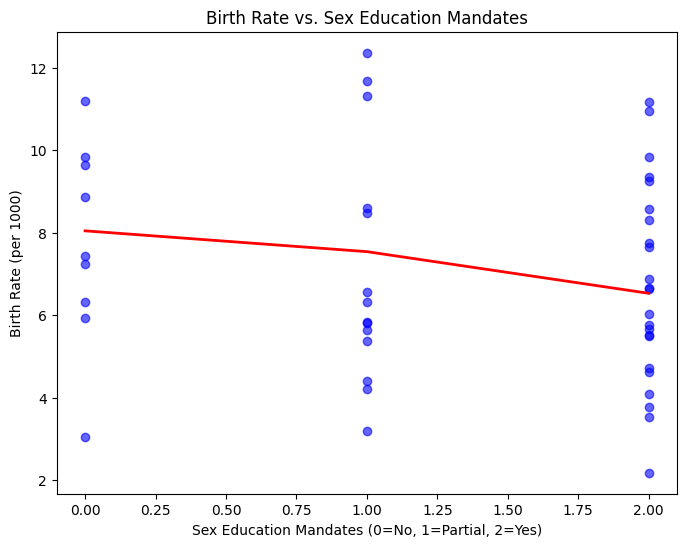

In [21]:
#Using the regression model I'm going to create avisualization with that shows the correlation between birth rate and sex ed
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(8, 6))
#mapping yes, no, and partial to numerical values
mapping = {"No": 0, "Partial": 1, "Yes": 2}
regression_merged_data["Mandates Sex Ed?"] = regression_merged_data["Mandates Sex Ed?"].map(mapping)
plt.scatter(regression_merged_data["Mandates Sex Ed?"], regression_merged_data["BirthRate"], color='blue', alpha=0.6)
#Regression line
x = np.array([0, 1, 2]).reshape(-1, 1)
y_pred = regmodel2.predict(pd.get_dummies(pd.Series(["No", "Partial", "Yes"]), prefix="Mandate", drop_first=True))
plt.plot([0, 1, 2], y_pred, color='red', linewidth=2)
#plt.xticks([0, 1, 2], ["No", "Partial", "Yes"])
plt.title("Birth Rate vs. Sex Education Mandates")
plt.xlabel("Sex Education Mandates (0=No, 1=Partial, 2=Yes)")
plt.ylabel("Birth Rate (per 1000)")
plt.show()

**Polynomial Regression Model**
- This model was created as part of my analysis, to compare a different type of model to the regression model I started with. I concluded that my initial model was the best fit for my dataset and the type of visualization I was going for. 

In [27]:
#Polynomal Regression Model, part of the analysis step
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
regression_merged_data = pd.merge(total_births_by_state_2023_2025, StateLawDF, on="State")
regression_merged_data = pd.merge(regression_merged_data, CensusPopulationClean, on="State")
regression_merged_data["BirthRate"] = regression_merged_data["Births"] / regression_merged_data["Teen_Female_Population"] * 1000
poly_features = PolynomialFeatures(degree=4)
X_poly = poly_features.fit_transform(pd.get_dummies(regression_merged_data["Mandates Sex Ed?"], drop_first=True))
y = regression_merged_data["BirthRate"]
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)
regmodel2 = LinearRegression()
regmodel2.fit(X_train, y_train)
#Testing:
print("Model Coefficients:", regmodel2.coef_)

Model Coefficients: [ 0.00000000e+00 -1.26246964e-01 -3.78914132e-01 -1.26246964e-01
 -4.92643991e-47 -3.78914132e-01 -1.26246964e-01  0.00000000e+00
  0.00000000e+00 -3.78914132e-01 -1.26246964e-01  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -3.78914132e-01]


## Resources and References
*What resources and references have you used for this project?*
📝 <!-- Answer Below -->

Resourced used: 
- https://wonder.cdc.gov/
- https://data.census.gov/
- https://actionpde.org/sex-education-laws-by-state/
- https://www.pdfplumber.com/
- https://www.cdc.gov/nchs/state-stats/births/teen-births.html
- https://pythonguides.com/transparent-plot-backgrounds-and-legend-styling-matplotlib-python/
- https://matplotlib.org/stable/gallery/shapes_and_collections/hatch_style_reference.html
- https://matplotlib.org/stable/users/explain/customizing.html
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.melt.html
- https://www.geeksforgeeks.org/python/python-pandas-melt/
- https://www.geeksforgeeks.org/pandas/python-pandas-get_dummies-method/
- https://www.geeksforgeeks.org/machine-learning/multiple-linear-regression-with-scikit-learn/
- https://saturncloud.io/blog/linear-regression-with-sklearn-using-categorical-variables/
- https://realpython.com/train-test-split-python-data/#training-validation-and-test-sets
- https://www.techtarget.com/searchenterpriseai/definition/data-splitting
- https://www.geeksforgeeks.org/machine-learning/python-implementation-of-polynomial-regression/#google_vignette


In [110]:
# ⚠️ Make sure you run this cell at the end of your notebook before every submission!
!jupyter nbconvert --to python source.ipynb

[NbConvertApp] Converting notebook source.ipynb to python
[NbConvertApp] Writing 19644 bytes to source.py
